In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
from sklearn import cluster
%matplotlib inline 
#makes matplotlib show up! 

In [3]:
traffic = pd.read_csv('/Users/davidnyberg/Downloads/us-traffic-2015_new/dot_traffic_2015.txt.gz', compression='gzip', 
                         header=0, sep=',', quotechar='"')

In [4]:
traffic.shape
#7million entries is too much to work with

(7140391, 38)

In [5]:
#random sampling without replacement
traffic_sam = traffic.sample(frac = .2, replace = False)
traffic_sam.shape

#Now can use 1.4 million points for datamining for quicker analysis

(1428078, 38)

In [ ]:
#creating a new csv file of this -
#traffic_sample = pd.DataFrame(traffic_sam)
#traffic_sam.to_csv("/Users/davidnyberg/Downloads/us-traffic-2015/traffic.csv")


In [6]:
#drop useless columns, try's just for annoying errors if you accidently run this block again...
try:
    traffic_sam = traffic_sam.drop(['year_of_data'], axis = 1)
except ValueError:
    pass
try:
    traffic_sam = traffic_sam.drop(['fips_state_code'], axis = 1)
except ValueError:
    pass
try:
    traffic_sam = traffic_sam.drop(['record_type'], axis = 1)
except ValueError:
    pass
try:
    traffic_sam = traffic_sam.drop(['restrictions'], axis = 1)
except ValueError:
    pass
try:
    traffic_sam = traffic_sam.drop(['station_id'], axis = 1)
except ValueError:
    pass


In [7]:
traffic_sam.head(10)

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,functional_classification,functional_classification_name,lane_of_travel,month_of_data,traffic_volume_counted_after_0000_to_0100,...,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
6140590,2015-03-26,26,5,1,North,3R,Rural: Principal Arterial - Other,1,3,4,...,88,115,125,86,80,58,36,47,26,9
1738282,2015-06-20,20,7,1,North,3U,Urban: Principal Arterial - Other,0,6,115,...,1048,995,1048,967,818,638,521,428,380,211
5316195,2015-12-20,20,1,1,North,1U,Urban: Principal Arterial - Interstate,5,12,104,...,1239,1227,1141,1025,837,575,395,330,247,116
3807881,2015-08-12,12,4,7,West,1R,Rural: Principal Arterial - Interstate,1,8,24,...,186,160,163,148,114,86,77,51,36,36
5592050,2015-01-03,3,7,3,East,1U,Urban: Principal Arterial - Interstate,1,1,116,...,586,533,533,550,537,446,397,445,367,229
2850670,2015-05-06,6,4,1,North,2U,Urban: Principal Arterial - Other Freeways or ...,1,5,32,...,370,499,445,358,230,138,144,107,79,49
1428432,2015-09-19,19,7,1,North,4R,Rural: Minor Arterial,2,9,0,...,49,49,42,49,38,30,10,9,6,3
5852520,2015-08-01,1,7,4,Southeast,3U,Urban: Principal Arterial - Other,2,8,77,...,313,305,308,306,313,246,192,182,182,117
6088918,2015-10-01,1,5,5,South,4U,Urban: Minor Arterial,0,10,34,...,724,723,817,781,572,398,291,160,123,59
7136802,2015-03-25,25,4,7,West,4U,Urban: Minor Arterial,2,3,21,...,161,137,174,130,98,118,96,82,43,33


In [ ]:
#testing some regression stats
m = ols('day_of_week ~ traffic_volume_counted_after_1600_to_1700',traffic).fit()
print m.summary()

In [ ]:
#interesting that there are higher volumes in jan/feb compared to summer!
#can change this for all times, not just 1600-1700
plt.scatter(traffic_sam.month_of_data, traffic_sam.traffic_volume_counted_after_1600_to_1700)
plt.xlabel('Month')
plt.ylabel('traffic volume')

In [ ]:
#traffic_1 = traffic_sam.iloc[:, 8:10]
#traffic_1 is month_of_data , and all the traffic volumes all 24 hrs
#traffic_1.head(1)

In [ ]:
#now can use numpy arrays and sklearn for clustering 
traffic_n = np.array(traffic_1)


In [8]:
clust = traffic[['month_of_data','traffic_volume_counted_after_1500_to_1600']]
clusters = np.array(clust)

In [9]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(clusters)

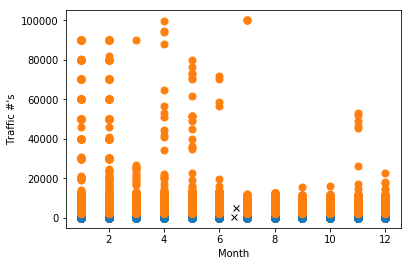

In [10]:
labels = kmeans.predict(clusters)
centroids = kmeans.cluster_centers_
#code to display from : 
#https://www.springboard.com/blog/data-mining-python-tutorial/
for i in range(2):
    ds = clusters[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    lines = plt.plot(centroids[i,0],centroids[i,1], 'kx')
plt.xlabel("Month")
plt.ylabel("Traffic #'s")
plt.show()

In [ ]:
traffic_sam.corr().style.format("{:2}").background_gradient(cmap=plt.get_cmap('coolwarm'))
#shows correlation between attributes